## COSC 3337 - HW3 - Ujwal Joshi

### Problem Statement

A business provides you with the following data and wants you to find patterns in their customer's habits so that they can make better recommendations and target certain groups in the future.  

Answer the following:  
Would we approach this as a supervised or unsupervised learning task and why?  
**answer:** We should approach this as a unsupervised learning task because since the business wants us to find clear patterns and trends in the habits rather than providing a concrete or definitite answer for a question.

### About The Data
- ID
- Gender
- Spending Score
- Age
- Income

### Step 1
Begin by importing the data and displaying the first 5 observations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('data_h3_3337.csv')
customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Answer the following using Pandas:  
How many observations are there in total?

In [5]:
print(f'There are {customers_df.shape[0]} observations in total')

There are 200 observations in total


Are there any missing values? 

In [6]:
customers_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset.  

How many unique values are in each column?

In [7]:
unique_vals_pd = pd.DataFrame({
    'Unique Value Count': customers_df.apply(lambda col: len(col.unique())),
    'Unique Values': customers_df.apply(lambda col: col.unique())
})

unique_vals_pd

,Unique Value Count,Unique Values
CustomerID,200,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Gender,2,"[Male, Female]"
Age,51,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2..."
Annual Income (k$),64,"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2..."
Spending Score (1-100),84,"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,..."


### Step 2 (visualizations)

Create the following plots: A histogram of Age, Annual Income (k$), and Spending Score (1-100). 

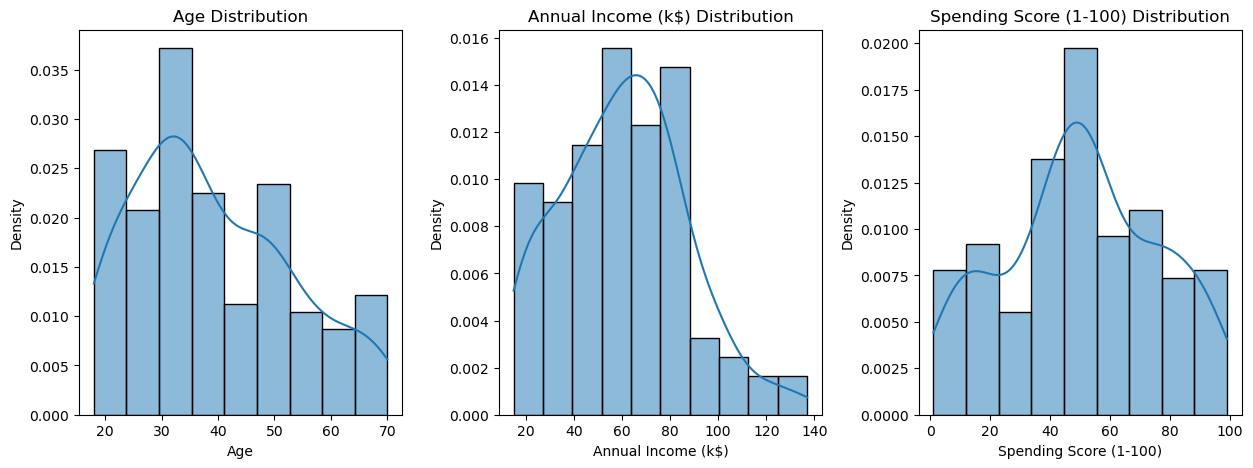

In [23]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), gridspec_kw={'wspace': 0.3})

for i, col in enumerate(cols):
    sns.histplot(data=customers_df, x=col, stat="density", kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  
**answer:** The distribution of both Age and Annual Income seem slightly right skewed while Spending Score does not (relatively) seem that skewed.

Create a pie chart showing the proportions of male to female in our data.

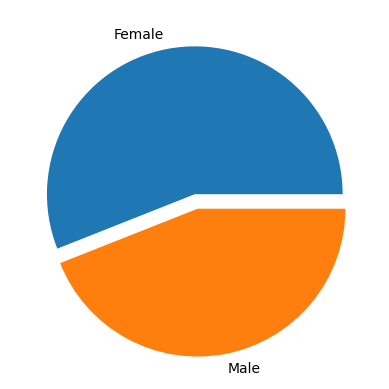

In [33]:
gender_proportions = customers_df['Gender'].value_counts().to_dict()

plt.pie(gender_proportions.values(), labels=gender_proportions.keys(), explode=(0, 0.1))
plt.show()

Answer the following:  
What can you conclude from the plot you created?   
**answer:** There are far more data points in this dataset that are Female compared to Men.

Create a heatmap of the data. 

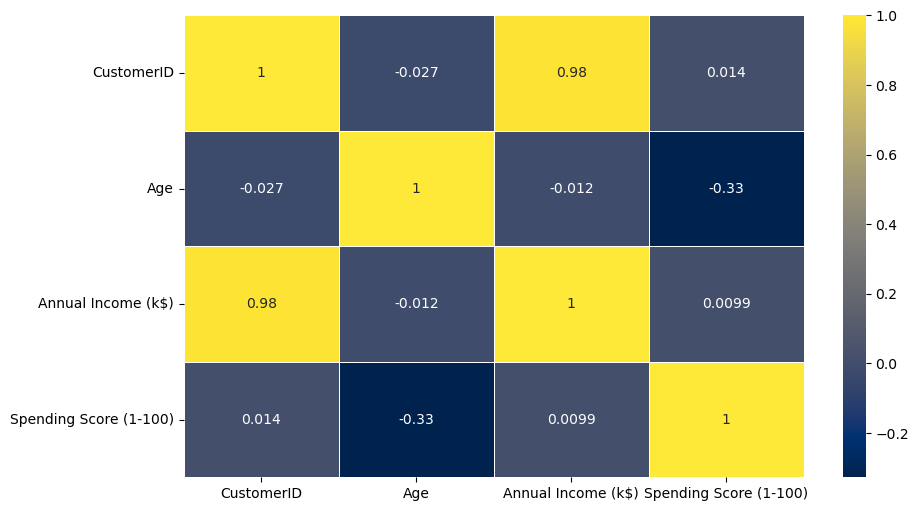

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(customers_df.drop(columns=['Gender']).corr(), annot=True, cmap='cividis', linewidth=0.5)
plt.show()

Answer the following:  
After creating your heatmap, is there anything interesting? For example, any significant multicollinearity?  
**answer:** There seems to be significant multicollinearity between customerID and Annual Income.

Create the following plots: A scatter plot of Age vs. Annual Income (k$), Age vs. Spending Score (1-100), and Annual Income (k$) vs. Spending Score (1-100).

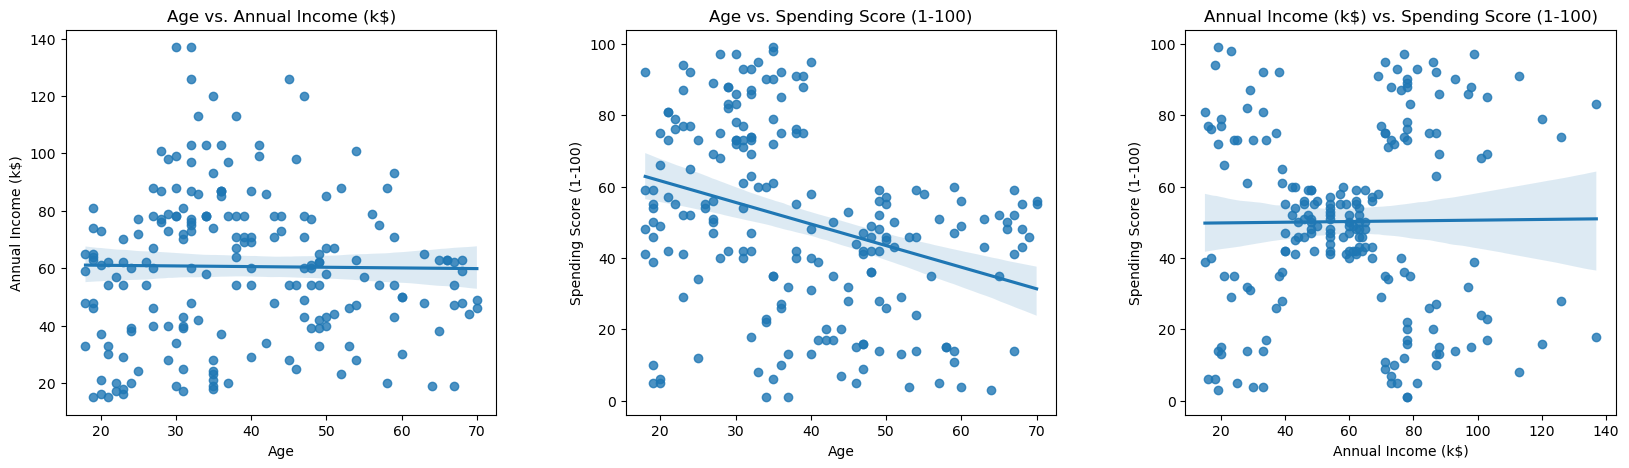

In [48]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), gridspec_kw={'wspace': 0.3})

sns.regplot(data=customers_df, x=cols[0], y=cols[1], ax=axes[0])
axes[0].set_title(f'{cols[0]} vs. {cols[1]}')

sns.regplot(data=customers_df, x=cols[0], y=cols[2], ax=axes[1])
axes[1].set_title(f'{cols[0]} vs. {cols[2]}')

sns.regplot(data=customers_df, x=cols[1], y=cols[2], ax=axes[2])
axes[2].set_title(f'{cols[1]} vs. {cols[2]}')

plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  
**answer:** Neither Age and Annual Income nor Annual Income and Spending Score seem to have any form of linear relationship, however Age and Spending Score seem to have a weak negative linear relationship. The data implies that younger customers seem to generally have a higher spending score than older customers.

Create a line graph of Annual Income (k$) vs. Spending Score (1-100) for both genders. 

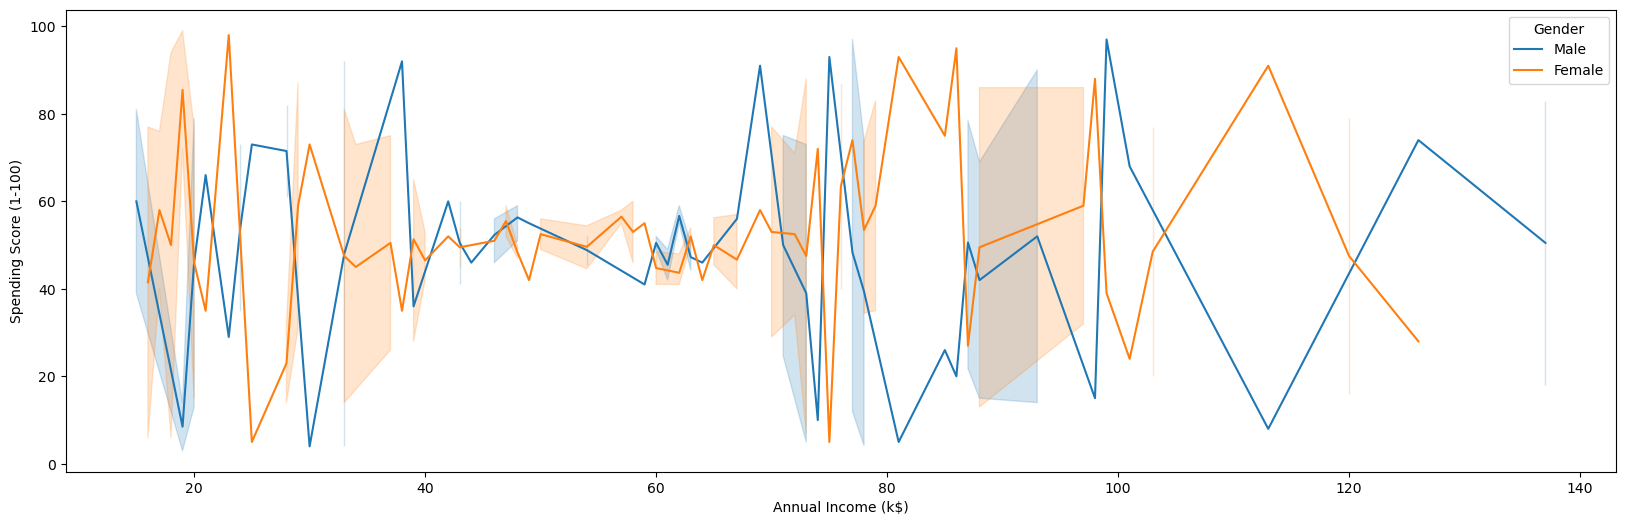

In [60]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=customers_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

Answer the following:  
What can you say about the plot you created?  
**answer:** Annual income and Spending Score seem to have some form of inverse relationship when accounting for Male vs. Female.